In [1]:
%run 7.2.3-perceptron.ipynb

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter, LinearLocator

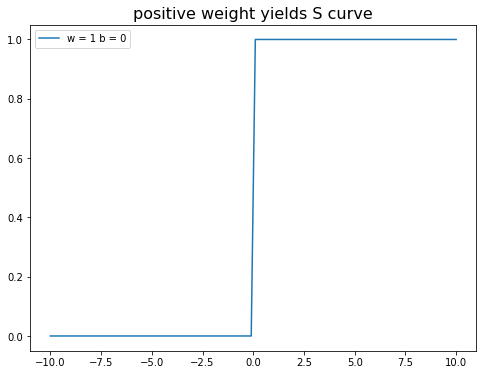

/Users/ananya.h.a/.virtualenvs/dl_book/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


In [3]:
mpl.rcParams['legend.fontsize'] = 10
# 1D S curves - positive weight
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
x = torch.linspace(start=-10, end=10, steps=100)
w = torch.tensor([1.0], dtype=torch.float32)
b = torch.tensor([0.0])
y = Perceptron(X=x.unsqueeze(dim=1), W=w.unsqueeze(dim=1), b=b, activation=torch.heaviside)
ax.plot(x.squeeze(), y.squeeze(), label="w = 1 b = 0")
plt.title("positive weight yields S curve", fontsize=16)
ax.legend()
plt.show()
fig.show()

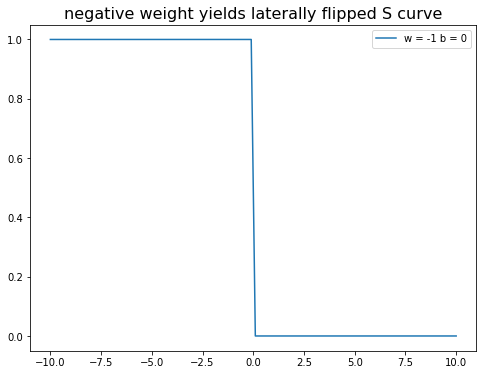

/Users/ananya.h.a/.virtualenvs/dl_book/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


In [4]:
# 1D S curves - negative weight
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
x = torch.linspace(start=-10, end=10, steps=100)
w = torch.tensor([-1.0], dtype=torch.float32)
b = torch.tensor([0.0])
y = Perceptron(X=x.unsqueeze(dim=1), W=w.unsqueeze(dim=1), b=b, activation=torch.heaviside)
ax.plot(x.squeeze(), y.squeeze(), label="w = -1 b = 0")
plt.title("negative weight yields laterally flipped S curve", fontsize=16)
ax.legend()
plt.show()
fig.show()

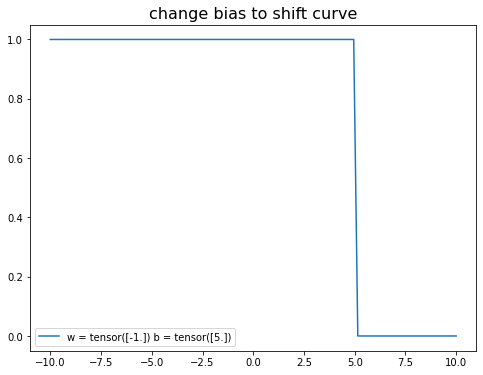

/Users/ananya.h.a/.virtualenvs/dl_book/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


In [5]:
# 1D S curves - negative weight + shift
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
x = torch.linspace(start=-10, end=10, steps=100)
w = torch.tensor([-1.0], dtype=torch.float32)
b = torch.tensor([5.0])
y = Perceptron(X=x.unsqueeze(dim=1), W=w.unsqueeze(dim=1), b=b, activation=torch.heaviside)
ax.plot(x.squeeze(), y.squeeze(), label="w = {} b = {}".format(w, b))
plt.title("change bias to shift curve", fontsize=16)
ax.legend()
plt.show()
fig.show()

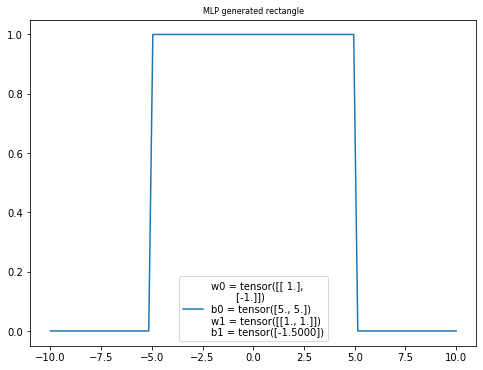

/Users/ananya.h.a/.virtualenvs/dl_book/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


In [6]:
# 1D towers (cybenko) - various W0
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
x = torch.linspace(start=-10, end=10, steps=100)
W0 = torch.tensor([[1.0], 
                   [-1.0]], dtype=torch.float32)
b0 = torch.tensor([5.0, 5.0])
W1 = torch.tensor([[1.0, 1.0]], dtype=torch.float32)
b1 = torch.tensor([-1.5])
y = MLP(X=x.unsqueeze(dim=1), W0=W0, W1=W1, b0=b0, b1=b1, activation0=torch.heaviside,activation1=torch.heaviside)
ax.plot(x.squeeze(), y.squeeze(),
        label="w0 = {} \nb0 = {}\nw1 = {} \nb1 = {}".format(W0, b0, W1, b1))
plt.title("MLP generated rectangle", fontsize=8)
ax.legend()
plt.show()
fig.show()

/Users/ananya.h.a/.virtualenvs/dl_book/lib/python3.7/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


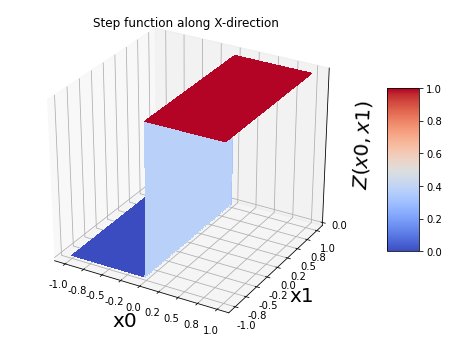

/Users/ananya.h.a/.virtualenvs/dl_book/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [7]:
# 2D Step function in X-direction
X = torch.linspace(start=-1, end=1, steps=100)
Y = torch.linspace(start=-1, end=1, steps=100)
gridX, gridY = torch.meshgrid(X, Y)
W = torch.tensor([[1.0, 0.0]], dtype=torch.float32)
b = torch.tensor([0.0], dtype=torch.float32)
X = torch.tensor([(y, x) for y, x in zip(gridX.reshape(-1), gridY.reshape(-1))])
Z = Perceptron(X=X, W=W, b=b, activation=torch.heaviside)
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection="3d")
surf = ax.plot_surface(
    gridX, gridY, Z.reshape(100, -1).numpy(), cmap=cm.coolwarm,
    linewidth=0, antialiased=False
)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_locator(LinearLocator(1))
ax.set_zlabel("$Z(x0, x1)$", fontsize=20, rotation=0)
ax.set_xlabel("x0", fontsize=20)
ax.set_ylabel("x1", fontsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Step function along X-direction')
plt.show()
fig.show()

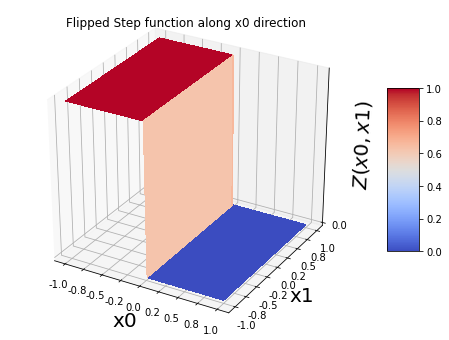

/Users/ananya.h.a/.virtualenvs/dl_book/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [8]:
# 2D Flipped Step function along X-direction
W = torch.tensor([[-1.0, 0.0]], dtype=torch.float32)
b = torch.tensor([0.0], dtype=torch.float32)
X = torch.tensor([(y, x) for y, x in zip(gridX.reshape(-1), gridY.reshape(-1))])
Z = Perceptron(X=X, W=W, b=b, activation=torch.heaviside)
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection="3d")
surf = ax.plot_surface(
    gridX, gridY, Z.reshape(100, -1).numpy(), cmap=cm.coolwarm,
    linewidth=0, antialiased=False
)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_locator(LinearLocator(1))
ax.set_zlabel("$Z(x0, x1)$", fontsize=20, rotation=0)
ax.set_xlabel("x0", fontsize=20)
ax.set_ylabel("x1", fontsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Flipped Step function along x0 direction')
plt.show()
fig.show()

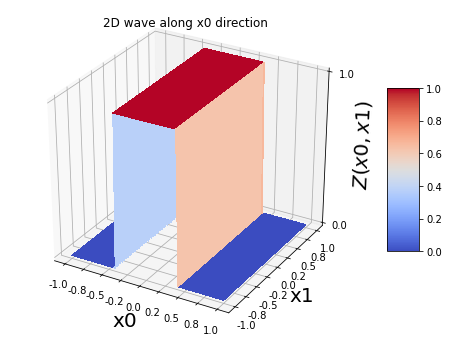

/Users/ananya.h.a/.virtualenvs/dl_book/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [9]:
# 2D wave along x-direction
X = torch.linspace(start=-1, end=1, steps=100)
Y = torch.linspace(start=-1, end=1, steps=100)
gridX, gridY = torch.meshgrid(X, Y)
X = torch.tensor([(y, x) for y, x in zip(gridX.reshape(-1), gridY.reshape(-1))])
W0 = torch.tensor([[1.0, 0.0],
                    [-1.0, 0.0]
                    ], dtype=torch.float32)
b0 = torch.tensor([0.4, 0.4], dtype=torch.float32)
W1 = torch.tensor([[1.0, 1.0]], dtype=torch.float32)
b1 = torch.tensor([-1.0])
Z = MLP(X=X, W0=W0, W1=W1, b0=b0, b1=b1, activation0=torch.heaviside)
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection="3d")
surf = ax.plot_surface(
    gridX, gridY, Z.reshape(100, -1).numpy(), cmap=cm.coolwarm,
    linewidth=0, antialiased=False
)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_locator(LinearLocator(2))
ax.set_zlabel("$Z(x0, x1)$", fontsize=20, rotation=0)
ax.set_xlabel("x0", fontsize=20)
ax.set_ylabel("x1", fontsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('2D wave along x0 direction')
plt.show()
fig.show()

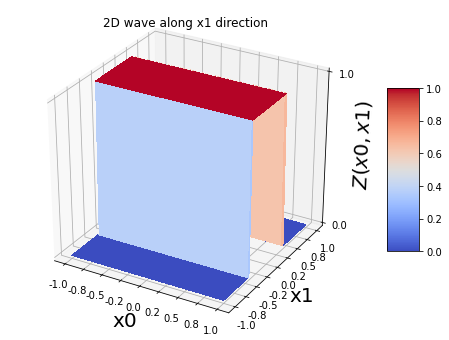

/Users/ananya.h.a/.virtualenvs/dl_book/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [10]:
# 2D wave along y-direction
X = torch.linspace(start=-1, end=1, steps=100)
Y = torch.linspace(start=-1, end=1, steps=100)
gridX, gridY = torch.meshgrid(X, Y)
X = torch.tensor([(y, x) for y, x in zip(gridX.reshape(-1), gridY.reshape(-1))])
W0 = torch.tensor([[0.0, 1.0],
                    [0.0, -1.0]
                    ], dtype=torch.float32)
b0 = torch.tensor([0.4, 0.4], dtype=torch.float32)
W1 = torch.tensor([[1.0, 1.0]], dtype=torch.float32)
b1 = torch.tensor([-1.0])
Z = MLP(X=X, W0=W0, W1=W1, b0=b0, b1=b1, activation0=torch.heaviside)
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection="3d")
surf = ax.plot_surface(
    gridX, gridY, Z.reshape(100, -1).numpy(), cmap=cm.coolwarm,
    linewidth=0, antialiased=False
)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_locator(LinearLocator(2))
ax.set_zlabel("$Z(x0, x1)$", fontsize=20, rotation=0)
ax.set_xlabel("x0", fontsize=20)
ax.set_ylabel("x1", fontsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('2D wave along x1 direction')
plt.show()
fig.show()

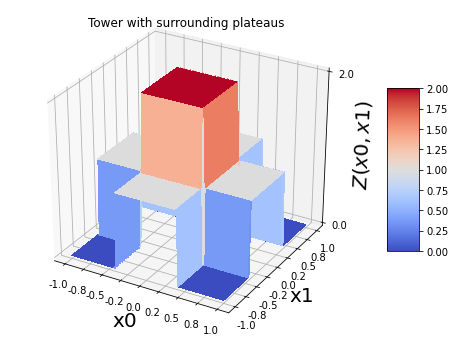

/Users/ananya.h.a/.virtualenvs/dl_book/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [11]:
X = torch.linspace(start=-1, end=1, steps=100)
Y = torch.linspace(start=-1, end=1, steps=100)
gridX, gridY = torch.meshgrid(X, Y)
X = torch.tensor([(y, x) for y, x in zip(gridX.reshape(-1), gridY.reshape(-1))])
W0 = torch.tensor([[1.0, 0.0],
                    [-1.0, 0.0],
                    [0.0, 1.0],
                    [0.0, -1.0]
                    ], dtype=torch.float32)
b0 = torch.tensor([0.4, 0.4, 0.4, 0.4], dtype=torch.float32)
W1 = torch.tensor([[1.0, 1.0, 1.0, 1.0]], dtype=torch.float32)
b1 = torch.tensor([-2.0])
Z = MLP(X=X, W0=W0, W1=W1, b0=b0, b1=b1, activation0=torch.heaviside)
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection="3d")
surf = ax.plot_surface(
    gridX, gridY, Z.reshape(100, -1).numpy(), cmap=cm.coolwarm,
    linewidth=0, antialiased=False
)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_locator(LinearLocator(2))
ax.set_zlabel("$Z(x0, x1)$", fontsize=20, rotation=0)
ax.set_xlabel("x0", fontsize=20)
ax.set_ylabel("x1", fontsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Tower with surrounding plateaus')
plt.show()
fig.show()

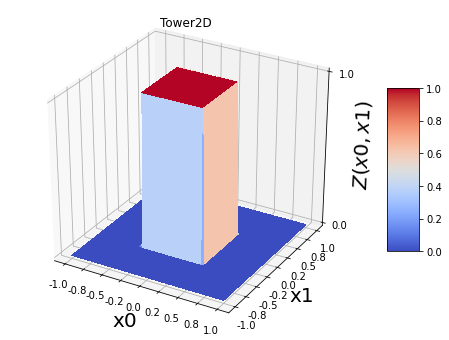

/Users/ananya.h.a/.virtualenvs/dl_book/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [12]:
# 2D Tower
X = torch.linspace(start=-1, end=1, steps=100)
Y = torch.linspace(start=-1, end=1, steps=100)
gridX, gridY = torch.meshgrid(X, Y)
X = torch.tensor([(y, x) for y, x in zip(gridX.reshape(-1), gridY.reshape(-1))])
W0 = torch.tensor([[1.0, 0.0],
                    [-1.0, 0.0],
                    [0.0, 1.0],
                    [0.0, -1.0]
                    ], dtype=torch.float32)
b0 = torch.tensor([0.4, 0.4, 0.4, 0.4], dtype=torch.float32)
W1 = torch.tensor([[1.0, 1.0, 1.0, 1.0]], dtype=torch.float32)
b1 = torch.tensor([-3.5])
Z = MLP(X=X, W0=W0, W1=W1, b0=b0, b1=b1, activation0=torch.heaviside, activation1=torch.heaviside)
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection="3d")
surf = ax.plot_surface(
    gridX, gridY, Z.reshape(100, -1).numpy(), cmap=cm.coolwarm,
    linewidth=0, antialiased=False
)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_locator(LinearLocator(2))
ax.set_zlabel("$Z(x0, x1)$", fontsize=20, rotation=0)
ax.set_xlabel("x0", fontsize=20)
ax.set_ylabel("x1", fontsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Tower2D')
plt.show()
fig.show()